# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [1]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) 데이터 불러오기 및 데이터 선택

In [4]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/EWHA/ESAA/data/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [18]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [19]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [20]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [21]:
# 릿지 모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

# 예측값 구하기
y_pred = ridge.predict(X_test)

# 전복 나이 예측 (껍질의 고리수에 1.5 추가)
y_age_pred = y_pred + 1.5

# MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_age_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 7.234717548270531, RMSE: 2.6897430264377546


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [29]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
alpha_rmse = []

#cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # 사이킷런은 성능 최대화된 값을 효과적으로 표현하기(MSE는 작을수록 성능 좋음) 위해 부호를 반대로 바꾸어 반환. 따라서 - 부호로 실제 MSE 계산
    scores = -cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(scores.mean())
    alpha_rmse.append((alpha, rmse))

In [30]:
# 최적 alpha
optimal_alpha = min(alpha_rmse, key=lambda x: x[1])
print(f"Optimal alpha: {optimal_alpha[0]}, RMSE: {optimal_alpha[1]}")

Optimal alpha: 1, RMSE: 2.218321515015645


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [31]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [32]:
#모델 생성 및 훈련
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

#예측값 구하기
y_pred = xgb.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_age_pred = y_pred + 1.5

#MSE와 RMSE 구하기
mse = mean_squared_error(y_test, y_age_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 8.2250, RMSE: 2.8679


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

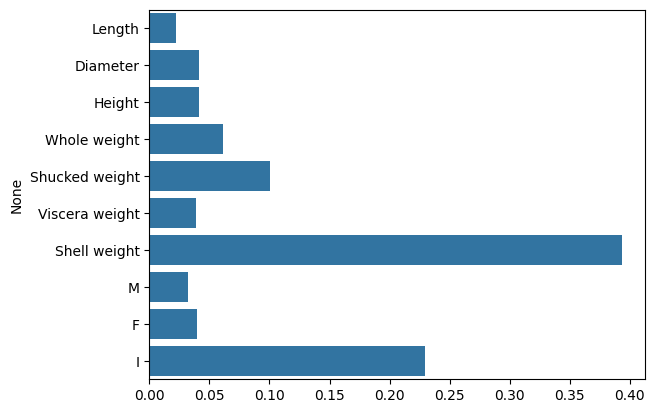

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = xgb.feature_importances_
features = data.columns

sns.barplot(x=feature_importances, y=features)
plt.show()

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [35]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [11]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [12]:
X_train, X_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

X_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [13]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 훈련
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [14]:
#기울기
logreg.coef_

array([[-5.43540490e-01,  5.49421440e-01,  5.53576129e-01,
        -2.76282544e-01, -8.59673464e-05,  1.97346576e-01,
         9.12652727e-01,  7.17889129e-02, -3.49531117e-02,
         9.15703016e-02, -1.74383021e-01,  5.09963709e-01,
         9.61662254e-03],
       [ 6.09851769e-01, -9.12551548e-01, -5.85113008e-01,
         2.24916150e-01, -2.28483438e-02,  3.16349549e-01,
        -8.44700019e-03,  1.44268211e-01,  5.32954225e-01,
        -8.01810388e-01,  6.07654660e-01,  1.94172207e-01,
        -7.80220473e-03],
       [-6.63112792e-02,  3.63130108e-01,  3.15368791e-02,
         5.13663945e-02,  2.29343112e-02, -5.13696125e-01,
        -9.04205727e-01, -2.16057123e-01, -4.98001114e-01,
         7.10240086e-01, -4.33271639e-01, -7.04135916e-01,
        -1.81441781e-03]])

In [15]:
#절편
logreg.intercept_

array([-0.82821037,  1.12186432, -0.29365395])

3-3) 모델의 정확도를 구하세요.

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
#모델의 예측값 구하기
y_pred = logreg.predict(X_test)

#모델의 정확도 구하기
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9444
